In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.유사도 분석 
  - 문장이나 문서의 유사도를 구하는 작업(유클리드 거리, 코사인 유사도 등)

### 1-1. 코사인 유사도
  -  두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도
  - 방향 동일 = 1,  90도 = 0, 180도 = -1

In [51]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,2])

print('문서 1과 문서2의 유사도 :',cos_sim(doc1, doc2))
print('문서 1과 문서3의 유사도 :',cos_sim(doc1, doc3))
print('문서 2와 문서3의 유사도 :',cos_sim(doc2, doc3))

문서 1과 문서2의 유사도 : 0.6666666666666667
문서 1과 문서3의 유사도 : 0.6666666666666667
문서 2와 문서3의 유사도 : 1.0000000000000002


In [52]:
import numpy as np
def cos_sim(A,B):
    return np.dot(A, B) / (np.linalg.norm(A)*np.linalg.norm(B))

a = [1,0,0,1]
b = [0,1,1,0]
c = [1,1,1,1]
print(cos_sim(a,b), cos_sim(b,c), cos_sim(c,a))

0.0 0.7071067811865475 0.7071067811865475


### 1-2. 유클리드 거리
  - 자카드 유사도나 코사인 유사도만큼, 유용한 방법은 아님.
  - 유클리드 거리의 값이 가장 작다는 것은 문서 간 거리가 가장 가깝다는 것을 의미 

In [53]:
import numpy as np

def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

doc1 = np.array((2,3,0,1))
doc2 = np.array((1,2,3,1))
doc3 = np.array((2,1,2,2))
docQ = np.array((1,1,0,1))

print('문서1과 문서Q의 거리 :',dist(doc1,docQ))
print('문서2과 문서Q의 거리 :',dist(doc2,docQ))
print('문서3과 문서Q의 거리 :',dist(doc3,docQ))

# 문서1이 문서Q와 가장 유사하다.

문서1과 문서Q의 거리 : 2.23606797749979
문서2과 문서Q의 거리 : 3.1622776601683795
문서3과 문서Q의 거리 : 2.449489742783178


### 1-3. jaccard Ditance
  - 0과 1사이의 값을 가지며, 만약 두 집합이 동일 = 1, 두 집합의 공통 원소 = 0
  - 교집합/합집합

In [54]:
doc1 = "apple banana everyone like likey watch card holder"
doc2 = "apple banana coupon passport love you"

# 토큰화
tokenized_doc1 = doc1.split()
tokenized_doc2 = doc2.split()

print('문서1 :',tokenized_doc1)
print('문서2 :',tokenized_doc2)

문서1 : ['apple', 'banana', 'everyone', 'like', 'likey', 'watch', 'card', 'holder']
문서2 : ['apple', 'banana', 'coupon', 'passport', 'love', 'you']


In [55]:
# 문서1과 문서2의 합집합
union = set(tokenized_doc1).union(set(tokenized_doc2))
print('문서1과 문서2의 합집합 :',union)

문서1과 문서2의 합집합 : {'banana', 'likey', 'apple', 'holder', 'coupon', 'you', 'passport', 'watch', 'love', 'card', 'like', 'everyone'}


In [56]:
# 문서1과 문서2의 교집합
intersection = set(tokenized_doc1).intersection(set(tokenized_doc2))
print('문서1과 문서2의 교집합 :',intersection)

문서1과 문서2의 교집합 : {'banana', 'apple'}


In [57]:
# 자카드 유사도
print('자카드 유사도 :',len(intersection)/len(union))

자카드 유사도 : 0.16666666666666666


### 1-4.레반슈타인 거리
  - 단어 사이의 거리를 나타내는 대표적인 척도
  - 단어 A를 단어 B로 수정하기 위한 최소 횟수

In [58]:
import numpy as np
def leven(text1, text2):
    len1 = len(text1) + 1
    len2 = len(text2) + 1
    sim_array = np.zeros((len1, len2))
    sim_array[:,0] = np.linspace(0, len1-1, len1)
    sim_array[0,:] = np.linspace(0, len2-1, len2)
    for i in range(1, len1):
        for j in range(1, len2):
            add_char = sim_array[i-1,j] + 1
            sub_char = sim_array[i,j-1] + 1
            if text1[i-1] == text2[j-1]:
                mod_char = sim_array[i-1,j-1] 
            else:
                mod_char = sim_array[i-1,j-1] + 1
            sim_array[i,j] = min([add_char, sub_char, mod_char])
    return sim_array[-1,-1]
print(leven('데이터마이닝','데이타마닝'))

2.0


# 2. Word2Vec - CBoW, SkipGram

## Word2Vec
- 정수인코딩/one-hot인코딩 단점 보완(원-핫 벡터는 단어 벡터 간 유의미한 유사도를 계산할 수 없다는 단점)
### Word2Vec Methods
#### CBOW((Continuous Bag of Words))
- 주변 단어를 활용해 중간에 있는 단어를 예측
#### Skip-Gram
- 중간 단어를 활용해 주변에 있는 단어를 예측
##### NNLM vs Word2Vec
- 워드 임베딩 자체에 집중하여 NNLM의 느린 학습 속도와 정확도를 개선하여 탄생 -> word2Vec
- NNLM의 한계
--> 정해진 길이의 과거 정보만을 참조하므로 함축 정보를 파악할 수 없다.
--> 문장의 길이가 달라질 경우 한계점이 명확하다.
- Word2Vec이 NNLM보다 학습 속도에서 강점을 가지는 이유
- 은닉층을 제거한 것뿐만 아니라 추가적으로 사용되는 기법들 덕분이기도 합니다.(계층적 소프트맥스(hierarchical softmax),네거티브 샘플링(negative sampling))

In [59]:
#1. Training Samples
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
data = pd.read_csv('./drive/MyDrive/NLP/NLP실습자료/transcripts.csv')
print('Missing Values: ', data.isnull().sum())
data = data.dropna().reset_index(drop=True)
merge_data = ''.join(str(data.iloc[i,0]) for i in range(100))
print('Total word count: ', len(merge_data))
print(merge_data[:40])

Missing Values:  transcript    0
url           0
dtype: int64
Total word count:  1511817
Good morning. How are you?(Laughter)It's


In [60]:
import nltk
nltk.download('stopwords')
tokenizer = RegexpTokenizer("[\w]+")
token_text = tokenizer.tokenize(merge_data)


stop_words = set(stopwords.words('english'))
token_stop_text = []
for w in token_text:
    if w not in stop_words:
        token_stop_text.append(w)
print('After cleaning :', len(token_stop_text))
print(token_stop_text[:10])

After cleaning : 147300
['Good', 'morning', 'How', 'Laughter', 'It', 'great', 'I', 'blown', 'away', 'whole']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
word2inx = {}
Bow = []
for word in token_stop_text:
    if word not in word2inx.keys():
        word2inx[word] = len(word2inx)
        Bow.insert(len(word2inx)-1,1)
    else:
        inx = word2inx.get(word)
        Bow[inx] += 1
print('Unique Words Count :', len(Bow))

Unique Words Count : 16689


- nltk 내장 함수를 이용한 CBow 학습

In [62]:
!pip install gensim==4.0.0
# 아래 코드에서 'Word2VecKeyedVectors' object has no attribute 'key_to_index' 에러가 뜬다면 ,,, 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
#2. Word2Vec Training
import numpy as np
token_stop_text = np.reshape(np.array(token_stop_text),[-1,1])
from gensim.models import Word2Vec
model = Word2Vec(size = 100, window = 5, min_count = 2, sg = 0) # size 안되면 > vector_size 
model.build_vocab(token_stop_text)
model.train(token_stop_text, total_examples = model.corpus_count, epochs = 30, report_delay = 1)
vocabs = model.wv.vocab # 코랩에서 실행 
#vocabs = model.wv.key_to_index.keys()
word_vec_list = [model.wv[i] for i in vocabs]

- PCA를 통한 학습 모델 시각화

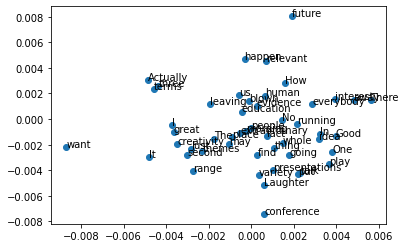

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2차원으로 축소
pcafit = pca.fit_transform(word_vec_list)
x = pcafit[0:50,0]
y = pcafit[0:50,1]
import matplotlib.pyplot as plt
plt.scatter(x, y, marker = 'o')
for i, v in enumerate(vocabs):
    if i <= 49:
        plt.annotate(v, xy = (x[i], y[i]))
plt.show()
# sg : kip-gram
# # vector_size : embedded vector size0 is CBOW, 1 is S
# window : context window size
# min_count : do not apply word2vec to sparse words

## 3. SGNS(SkipGram with Negative Sampling)
  - SGNS는 중심 단어와 주변 단어가 모두 입력이 되고, 이 두 단어가 실제로 윈도우 크기 내에 존재하는 이웃 관계인지 그 확률을 예측


SkipGram 전용 Dataset 구성 

In [67]:
#SGNS
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import numpy as np
data = pd.read_csv('./drive/MyDrive/NLP/NLP실습자료/transcripts.csv')
print('Missing Values: ', data.isnull().sum())
data = data.dropna().reset_index(drop=True)
merge_data = ''.join(str(data.iloc[i,0]) for i in range(30))
print('Total word count: ', len(merge_data))

Missing Values:  transcript    0
url           0
dtype: int64
Total word count:  507413


In [68]:
tokenizer = RegexpTokenizer("[\w]+")
token_text = tokenizer.tokenize(merge_data)

stop_words = set(stopwords.words('english'))
token_stop_text = []
for w in token_text:
    if w not in stop_words:
        token_stop_text.append(w)
print('After cleaning :', len(token_stop_text))

After cleaning : 50038


In [69]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(token_stop_text)
word2idx = tokenizer.word_index
encoded = tokenizer.texts_to_sequences(token_stop_text)
encoded = np.array(encoded).T
from tensorflow.keras.preprocessing.sequence import skipgrams
skip_gram = [skipgrams(sample, vocabulary_size = len(word2idx)+1,
                       window_size = 10) for sample in encoded]

In [71]:
import torch
import torch.nn as nn
from torch import LongTensor as LT
from torch import FloatTensor as FT

Word2Vec의 원리는 각 단어마다 지정된 고유 벡터 값을 생성하는 것.
Word2Vec class에서 그 툴을 생성

In [72]:
class Word2Vec(nn.Module):
    def __init__(self, vocab_size, embed_size):
        super(Word2Vec, self).__init__()
        self.vocab_size = vocab_size
        self.embed_size = embed_size
        self.word1_vector = nn.Embedding(self.vocab_size, self.embed_size)
        self.word2_vector = nn.Embedding(self.vocab_size, self.embed_size)
        self.word1_vector.weight = \
            nn.Parameter(torch.cat([torch.zeros(1, self.embed_size), FT(self.vocab_size-1,
                                                                       self.embed_size).uniform_(-0.1, 0.1)]))
        self.word2_vector.weight = \
            nn.Parameter(torch.cat([torch.zeros(1, self.embed_size), FT(self.vocab_size - 1,
                                                                       self.embed_size).uniform_(-0.1, 0.1)]))
        self.word1_vector.weight.requires_grad = True
        self.word2_vector.weight.requires_grad = True

    def forward_word1(self, data):
        vec = LT(data)
        vec = vec.cuda() if self.word1_vector.weight.is_cuda else vec
        return self.word1_vector(vec)


    def forward_word2(self, data):
        vec = LT(data)
        vec = vec.cuda() if self.word2_vector.weight.is_cuda else vec
        return self.word2_vector(vec)

torch.bmm

[B,n,m] x [B,m,p] = [b,n,p]

In [73]:
class SGNS(nn.Module):
    def __init__(self, embed, vocab_size):
        super(SGNS, self).__init__()
        self.embed = embed
        self.vocab_size = vocab_size
        self.weights = None
    def forward(self, word1, word2, label):
        word1 = self.embed.forward_word1(word1).unsqueeze(1)
        word2 = self.embed.forward_word2(word2).unsqueeze(2)
        label = LT(label).unsqueeze(1)  
        prediction = torch.bmm(word1, word2).squeeze(2).sigmoid().log()
        loss = -label * prediction # 이부분이 함정
        return loss.mean()

In [74]:
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
vocab_size = len(word2idx)+1
word2vec = Word2Vec(vocab_size = vocab_size, embed_size = 100)
sgns = SGNS(embed = word2vec, vocab_size = vocab_size)
optim = Adam(sgns.parameters())
print('Train Ready')

Train Ready


In [75]:
for _, element in enumerate(skip_gram):
    word1 = LT(np.array(list(zip(*element[0]))[0], dtype = 'int32'))
    word2 = LT(np.array(list(zip(*element[0]))[1], dtype = 'int32'))
    label = LT(np.array(element[1], dtype = 'int32'))
    dataset = TensorDataset(word1, word2, label)
    train_loader = DataLoader(dataset, batch_size = 256, shuffle = True)
print('Data Loaded')

Data Loaded


In [76]:
for epoch in range(5):
    with tqdm(train_loader, unit = 'batch') as tepoch:
        for word1, word2, label in tepoch:
            loss = sgns(word1, word2, label)
            optim.zero_grad()
            loss.backward()
            optim.step()
            tepoch.set_description(f"Epoch {epoch}")
            tepoch.set_postfix(loss = loss.item())

Epoch 4: 100%|██████████| 7818/7818 [04:10<00:00, 31.19batch/s, loss=7.01e-8]


In [78]:
f = open('./drive/MyDrive/NLP/NLP실습자료/vectors.txt' ,'w')
ww = 0
f.write('{} {}\n'.format(7930, 100))
vectors = word2vec.word1_vector.weight.detach().numpy()
for i, v in enumerate(word2idx.keys()):
    try:
        f.write('{} {}\n'.format(v, ' '.join(map(str, list(vectors[i+1, :])))))
        ww += 1
    except:
        print('Non-English Characters')
f.close()
import gensim
embed_word2vec = gensim.models.KeyedVectors.load_word2vec_format('./drive/MyDrive/NLP/NLP실습자료/vectors.txt', binary = False)



In [79]:
embed_word2vec.most_similar(positive = ['country'])

[('five', 0.9872949719429016),
 ('working', 0.9862990975379944),
 ('look', 0.9848188757896423),
 ('goes', 0.9845615029335022),
 ('sense', 0.9842778444290161),
 ('looks', 0.9840498566627502),
 ('business', 0.9838881492614746),
 ('left', 0.9838716983795166),
 ('points', 0.9838564395904541),
 ('based', 0.9837853312492371)]

In [80]:
embed_word2vec.most_similar(positive = ['obey'])

[('curiosity', 0.9784706234931946),
 ('afghanistan', 0.9779958724975586),
 ('danger', 0.9770547151565552),
 ('economically', 0.977022647857666),
 ('workers', 0.9768456220626831),
 ('dirty', 0.9765515327453613),
 ('understanding', 0.9758466482162476),
 ('climate', 0.9758114218711853),
 ('garbage', 0.9756764769554138),
 ('discrete', 0.9753727912902832)]

In [81]:
embed_word2vec.most_similar(positive = ['love'])

[('single', 0.9857136607170105),
 ('put', 0.9852709770202637),
 ('like', 0.9851377606391907),
 ('comes', 0.9849187731742859),
 ('going', 0.9849139451980591),
 ('came', 0.9848138689994812),
 ('see', 0.984792947769165),
 ('they', 0.9839499592781067),
 ('coming', 0.9835017323493958),
 ('said', 0.9834835529327393)]